# Matplotlib

## Introduction

<iframe width="560" height="315" src="https://www.youtube.com/embed/EmRM05EeNeM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Matplotlib is the most important plotting library in Python.  There are many nice Python plotting libraries, each with their own strengths. (My personal favorites are Altair and Plotly.)  But no other plotting library is as flexible or as widely used as Matplotlib.

Typically we do not import the entire Matplotlib library, but instead import its submodule `pyplot`.   The standard abbreviation for `pyplot` is `plt`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The following is an equivalent way to import `pyplot`.  Here we've just commented it out.

In [1]:
# from matplotlib import pyplot as plt

There are a few different approaches to plotting in Matplotlib.  (That can make Matplotlib harder to learn than for example NumPy. When I was first learning Matplotlib, I found it difficult to internalize its syntax, because the code examples I found online often used different but similar-looking approaches.)  We are going to focus on what is called the *object-oriented* interface.  We'll see the main alternative, which is called the *state-based* interface, in the [next section](interfaces).

We will use `plt.subplots()` to create the figure in which we will do the plotting.  In the following we define the output to be `z`, but using this variable `z` is not standard.  We will see the standard approach a few cells below.

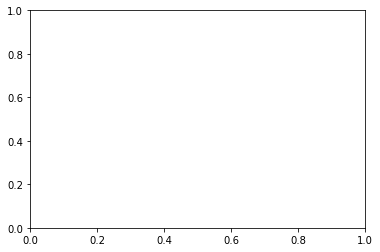

In [2]:
z = plt.subplots()

This variable `z` now represents a length-2 tuple.

In [3]:
type(z)

tuple

In [4]:
len(z)

2

What elements are in this length-2 tuple?  The 0-th element in `z` is what is called a `Figure` object in Matplotlib.

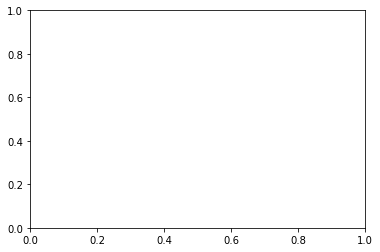

In [5]:
z[0]

In [6]:
type(z[0])

matplotlib.figure.Figure

The element `z[1]` is an `Axes` object.  (Aside: notice this word "axes" is spelled with an "e", not with an "i".)

In [7]:
z[1]

<AxesSubplot:>

In [8]:
type(z[1])

matplotlib.axes._subplots.AxesSubplot

Rather than assigning `z = plt.subplots()` as we did above, it is conventional to use what is called "tuple unpacking", so that the resulting figure gets assigned to the variable `fig` and the resulting axes object gets assigned to the variable `ax`.

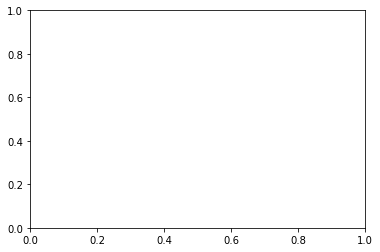

In [9]:
fig, ax = plt.subplots()

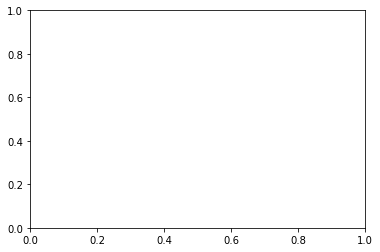

In [10]:
fig

In [11]:
type(fig)

matplotlib.figure.Figure

In [12]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

It's finally time to do some plotting.  We plot by calling the `plot` method of the `Axes` object.  (The fact that we're calling a method of an object, as opposed to calling some independent function defined in Matplotlib, is why this approach is called the "object-oriented" interface.)

As far as what arguments are passed to `plot`, the syntax is extremely similar to Matlab.  (In general, much of the syntax of Matplotlib is similar to, and inspired by, Matlab.)  The first argument should specify the $x$-coordinates and the next argument should specify the $y$-coordinates.

Here is an example.  Let's try to plot $y = \cos(x)$ for $x$ from 0 to 6.  We will see how to make it look better in the following cells.  

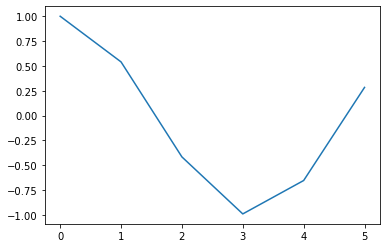

In [13]:
fig, ax = plt.subplots()
ax.plot(range(6), np.cos(range(6)))

One issue with the above (not a visual issue but a coding issue) is that the code is not *DRY* (which stands for "Don't Repeat Yourself").  The fact that we're repeating `range(6)` twice is a violation of the DRY principle.  We fix that by setting `x = range(6)` and then using `x` instead of `range(6)`.  This variable name `x` is a natural choice, because in this case `x` represents the $x$-coordinates.

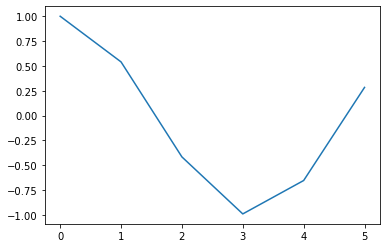

In [14]:
fig, ax = plt.subplots()
x = range(6)
ax.plot(x, np.cos(x))

Another small issue with the above code is that we had wanted to plot the curve from 0 to 6, but since `range(6)` stops at 5, we should change `range(6)` to `range(7)`.  Now that our code is more DRY, making this change is less prone to mistakes, because we only have to change `6` to `7` in one place.

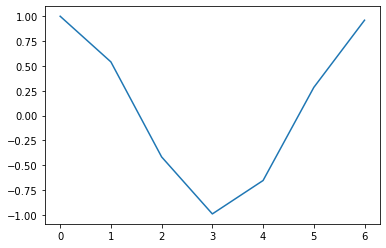

In [15]:
fig, ax = plt.subplots()
x = range(7)
ax.plot(x, np.cos(x))

One more minor issue is the `[<matplotlib.lines.Line2D at 0x1150195a0>]` getting displayed at the top.  We can get rid of that by using a semi-colon `;` after the last line.  (I think this is the only application of semi-colons I know in Python, unlike Matlab, where we used semi-colons all the time.)

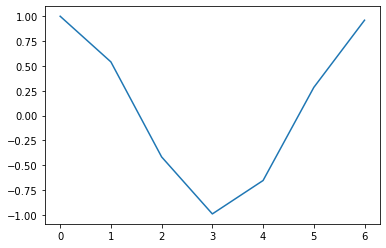

In [17]:
fig, ax = plt.subplots()
x = range(7)
ax.plot(x, np.cos(x));

Let's get to the real issue now, the fact that the graph doesn't look good, because it is so jagged.  The reason it looks so jagged is because it is plotting only 7 points and then connecting them with straight lines.  (That's the exact same as using `plot` in Matlab; the plotted points get connected by straight lines.)  We could try to fix that by using a step size of `0.1`, but we can't use floats inside of `range`.

TypeError: 'float' object cannot be interpreted as an integer

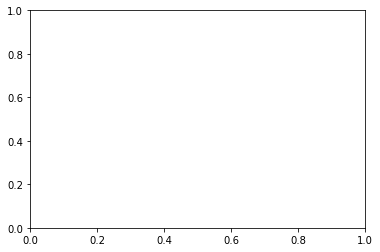

In [18]:
fig, ax = plt.subplots()
x = range(0,7,0.1)
ax.plot(x, np.cos(x));

If we switch from `range` to NumPy's `arange`, then we can use `0.1` as a step size, and the graph looks much more smooth.  (Comment.  I noticed after recording the video that we're now going past `x=6`.  I guess this version stops at 6.9.  That wasn't intentional.)

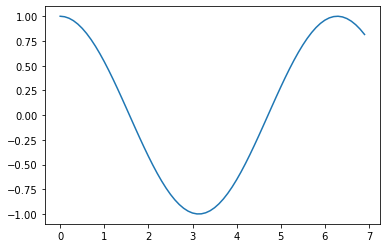

In [19]:
fig, ax = plt.subplots()
x = np.arange(0,7,0.1)
ax.plot(x, np.cos(x));

Another option, which looks pretty similar, is to use `np.linspace` to make `x`.  In this case, we specify that there should be 100 (evenly spaced) sample points chosen.  (Again, to match what I asked for above, it would be better to use `np.linspace(0,6,100)`, so it stops at 6 rather than at 7.)

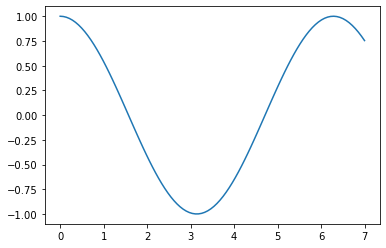

In [20]:
fig, ax = plt.subplots()
x = np.linspace(0,7,100)
ax.plot(x, np.cos(x));

(interfaces)=
## The two Matplotlib interfaces

<iframe width="560" height="315" src="https://www.youtube.com/embed/c_CvCUHz-IU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

For an overview of these two interfaces, it is worth reading from the Matlab documentation directly.  Reference: [Matplotlib User Guide: The Lifecycle of a Plot](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html#a-note-on-the-object-oriented-api-vs-pyplot).

> Matplotlib has two interfaces. The first is an object-oriented (OO) interface. In this case, we utilize an instance of `axes.Axes` in order to render visualizations on an instance of `figure.Figure`. The second is based on MATLAB and uses a state-based interface. **In general, try to use the object-oriented interface over the pyplot interface.**

In Math 9, we ask that you use the object-oriented interface (as we did in the above section).

### The object-oriented interface

In [1]:
import numpy as np
import matplotlib.pyplot as plt

This is a recap of what we did above.  Notice how we are using the `plot` method of `ax`, which is an `Axes` object.

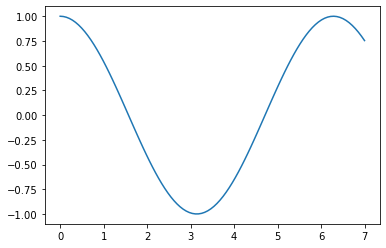

In [2]:
fig, ax = plt.subplots()
x = np.linspace(0,7,100)
ax.plot(x, np.cos(x));

In [3]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

The variable `fig` also represents an object.  (The distinction between `fig` and `ax` might be more clear later, where we have a single `Figure` holding multiple `Axes` objects.)

In [4]:
type(fig)

matplotlib.figure.Figure

### The state-based interface

Here is the atlernative interface.  I would say that in Matplotlib code I see on the internet, this state-based interface is used more often, probably because it is more concise.  Nonetheless, it is recommended (in Math 9 and also in the official Matplotlib documentation) to use the object-oriented interface.  The reason for this recommendation is that the object-oriented interface tends to be more natural as visualizations become more complex.

In the following state-based interface example, `plt.plot` is fairly different from `ax.plot` above.  The expression `plt.plot` refers to the `plot` function in the `pyplot` module.  The expression `ax.plot` refers to the plot method of the object `ax`.  The arguments passed to `plot` are the same in both cases.

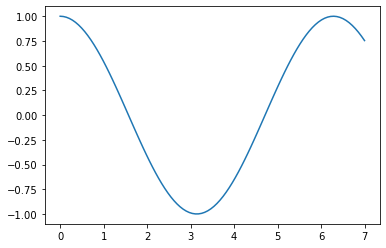

In [6]:
x = np.linspace(0,7,100)
plt.plot(x, np.cos(x));

Notice the first line in the documentation for `plt.plot`.

> Help on function plot in module matplotlib.pyplot:

That line reinforces what we were saying above, that this `plot` should be thought of as a function defined in `pyplot`, not as a method associated with a particular object.

In [7]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

We won't do anything more with this state-based approach, but it is good to know it exists so that you can recognize when it is being used.

## Multiple plots

<iframe width="560" height="315" src="https://www.youtube.com/embed/5jhO9CBRGR4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

We've seen an example of making a single plot.  Here we'll see two examples of making multiple plots.  In the first example, we will make all the plots on a single axes object (I think it really is spelled "axes", not "axis", in Matplotlib), and in the second example we will make six different plots.

Plot $y = \cos(kx)$ for $k = 1, 2, 3, 5, 7, 10$ between $x = 0$ and $x = 2\pi$
* on a single axes;
* on multiple axes.

**Warning**.  The images we make in this section will not look very good.  We'll see a few ways to customize the style later.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
𝑘_list = [1,2,3,5,7,10]

A common mistake is try typing `pi` on its own, but `pi` is not defined in Python.  We will use `np.pi` to get access to $\pi$.

In [4]:
x = np.linspace(0, 2*np.pi, 100)

We've often tried to avoid using for loops in Math 9, but this is an example where I think using a for loop is the most natural approach.  We have a single axes object, `ax`, and we call the `plot` method on it six times.  We use lambda functions to quickly define the six functions we're plotting.  (Side comment: be sure to use `k*x` instead of `kx`.  If you type `kx`, Python will look for a variable with the name `kx`.  Another side comment: we defined `x` above and we use `x` as the variable in our lambda function.  That is fine, they don't conflict, but it is good to be concerned about that.  The reason this works is because one of the two `x` variables is only defined inside a function.)

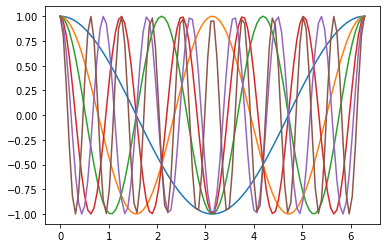

In [5]:
fig, ax = plt.subplots()

for k in k_list:
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)

Now let's see how to make these same six plots on different axes.

So far, we've been using `plt.subplots()`, with empty parentheses, but we can also pass some arguments to this `subplots` function.  The name `subplots`, especially the "s" at the end of it, already hints that we can make multiple subplots in a single figure.

In [6]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots have a shared x-axis along a column, on

In the following, `plt.subplots(3,2)`, the `3` specifies that there should be three rows of axes and the `2` specifies that there should be two columns of axes.

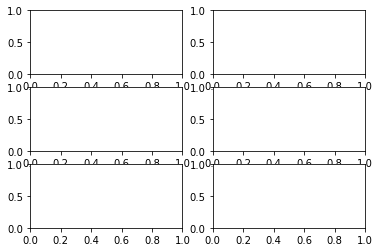

In [7]:
fig, axs = plt.subplots(3,2)

Previously, when we used `fig, ax = plt.subplots()`, the variable `ax` represented an `Axes` object.  In this case, where we are using `fig, axs = plt.subplots(3,2)`, the variable `axs` represents a NumPy array.  (I found that quite surprising when I first learned it, since NumPy is an external library and not part of standard Python.)

In [8]:
type(axs)

numpy.ndarray

The shape of `axs` is `(3,2)`, the same numbers as we passed to `subplots`.  This corresponds to our figure holding a 3-by-2 grid of axes.

In [9]:
axs.shape

(3, 2)

The entries in `axs` are themselves `Axes` objects.  For example, `axs[1,1]` will correspond to the `Axes` object in row 1, column 1 (where we start counting at 0).  We would like to iterate through these six axes objects, and that will be easier to do if we have a "flattened" version of `axs`.  

In [10]:
axs.reshape(-1)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [11]:
axs_flat = axs.reshape(-1)

We can use `axs_flat` to access all the subplots using a single index, with values `0` to `5`.  If we wanted to access for example `axs_flat[4]` using the original two-dimensional NumPy array `axs`, we would have to use two indices, `axs[2,0]`.

In [12]:
axs_flat[4]

<AxesSubplot:>

We can call the `plot` method on these individual `Axes` objects, just like we did in the previous sections.

In [13]:
axs_flat[4].plot([3,1,4])

Notice how `fig` still holds six subplots, and one of these subplots now has a simple line plot drawn on it.  (The `[3,1,4]` are viewed as the $y$-values, when only one input argument is given.  Again, this convention is the same as in Matlab.)

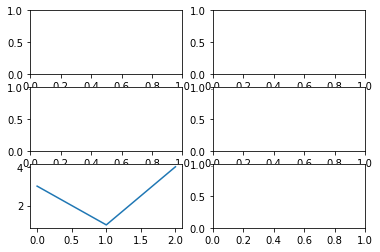

In [14]:
fig

If we tried to access the 4-th element of the original two-dimensional NumPy array `axs`, an error would be raised.  The following is trying to find the 4-th row of `axs`, but `axs` does not have a 4-th row.

In [15]:
axs[4]

IndexError: index 4 is out of bounds for axis 0 with size 3

We need to pair the coefficient `k_list[0]` with the `Axes` object `axs_flat[0]`, and to pair `k_list[1]` with `axs_flat[1]`, and so on.  The approach we use here is pretty un-Pythonic; we will see a better approach in the [next section](replacing-rangelen).  We will also see later how to make the style look a little more modern.

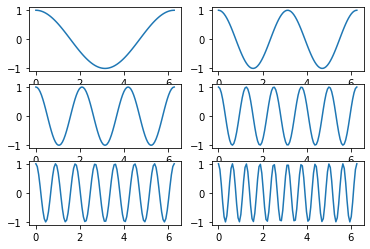

In [16]:
fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for i in range(len(k_list)):
    k = k_list[i]
    ax = axs_flat[i]
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)

(replacing-rangelen)=
## Replacing `range(len(k_list))`

<iframe width="560" height="315" src="https://www.youtube.com/embed/GsnFPJ95WA0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In the previous section, we used `range(len(k_list))` to get the indices of elements in `k_list`.  This was definitely more robust than just typing `range(6)`, but it was not the Pythonic way to get these indices.  We will see a better way to get those indices, using the function `enumerate`.

In our specific case, we never use the indices themselves; we only use them to access the corresponding elements in `axs_flat`.  So for our particular use-case here, it is more Pythonic to skip the indices entirely and use `zip`.

We start by copy-pasting the final code form above.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
𝑘_list = [1,2,3,5,7,10]

In [3]:
x = np.linspace(0, 2*np.pi, 100)

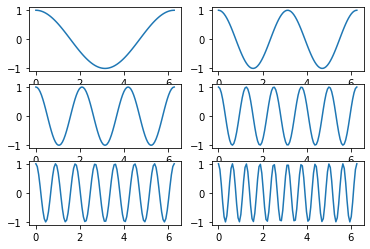

In [4]:
fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for i in range(len(k_list)):
    k = k_list[i]
    ax = axs_flat[i]
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)

Recall that `k_list` was our (somewhat random) list of coefficients.

In [5]:
k_list

[1, 2, 3, 5, 7, 10]

If we want both the index `i` and the corresponding entry `k`, the most Pythonic approach is to use the function `enumerate`.  Here is an example, but do you see what mistake we have made?

In [6]:
for i,k in enumerate(k_list):
    print("The value of i is {i}")
    print("The value of k is {k}")

The value of i is {i}
The value of k is {k}
The value of i is {i}
The value of k is {k}
The value of i is {i}
The value of k is {k}
The value of i is {i}
The value of k is {k}
The value of i is {i}
The value of k is {k}
The value of i is {i}
The value of k is {k}


We were using f-string syntax, but we forgot to put the `f` before the quotation marks.

Notice how, for example, the index `i = 4` corresponds to `k = 7` inside of `𝑘_list = [1,2,3,5,7,10]`.

In [7]:
for i,k in enumerate(k_list):
    print(f"The value of i is {i}")
    print(f"The value of k is {k}")

The value of i is 0
The value of k is 1
The value of i is 1
The value of k is 2
The value of i is 2
The value of k is 3
The value of i is 3
The value of k is 5
The value of i is 4
The value of k is 7
The value of i is 5
The value of k is 10


Now that the for loop gives us access to both the index `i` and the corresponding value of `k`, we can remove the `k = k_list[i]` portion of the above code.  Maybe more importantly, we can replace the awkward-looking `range(len(k_list))` portion with the more natural `enumerate(k_list)`.

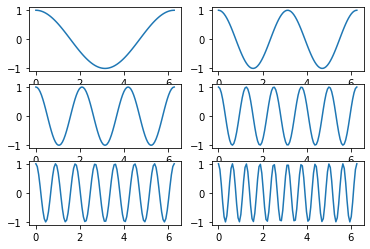

In [8]:
fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for i,k in enumerate(k_list):
    ax = axs_flat[i]
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)

Because we never actually used the `i` on its own (we only used it to find the corresponding element in `axs_flat`), it is even more Pythonic to use `zip` instead of `enumerate`.

Let's introduce `zip` in an easier example.  What `zip` will do is group the 0-th items together, the 1-st items together, and so on.  For example, in the following, `10` and `4` get grouped together, because `a_list[1]` is `10` and `b_list[1]` is `4`.

In [9]:
a_list = [7,10,2]
b_list = [3,4,5]

for a,b in zip(a_list, b_list):
    print(a,b)

7 3
10 4
2 5


The object actually produced by `zip` is a new type of object (a `zip` object!).

In [10]:
zip(a_list, b_list)

In [11]:
type(zip(a_list, b_list))

zip

But we can convert this `zip` object to for example a list, and then it is more clear how to think about `zip(a_list, b_list)`.  The list version is a list of length-2 tuples, where each tuple contains an element from `a_list` and the corresponding element from `b_list`.

In [12]:
list(zip(a_list, b_list))

[(7, 3), (10, 4), (2, 5)]

It's now pretty much effortless to make our six plots using `zip`.  Notice how we are able to remove the line `ax = axs_flat[i]` from the for loop, since `ax` is getting automatically assigned by the for loop statement `for k,ax in zip(k_list, axs_flat):`. 

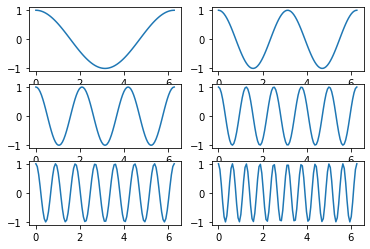

In [13]:
fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)

We've now seen three different approaches of making these six plots, one approach using `range`, one approach using `enumerate`, and one approach using `zip`.  All three are important to know, but in this particular example, the `zip` approach is the most Pythonic.

## Adjusting the appearance

<iframe width="560" height="315" src="https://www.youtube.com/embed/ASPmNW6ibQs" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

The plots we've made so far look pretty old-fashioned in comparison to modern plotting libraries.  This section will be a quick introduction to some of the ways we can adjust the style of our Matplotlib plots.  (The plots still will not look great after making these changes.  I recommend browsing the [Matplotlib example gallery](https://matplotlib.org/stable/gallery/index) to see some beautiful visualizations that can be made using Matplotlib.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Here is our starting code.  The code itself I think is good; it is the final visualization that I want us to improve.

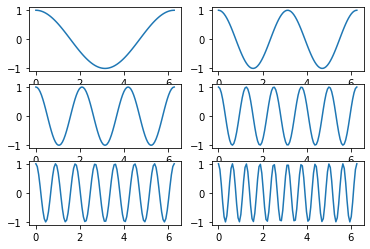

In [2]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)

The first improvement we are going to make is to call the `tight_layout` method on the `Figure` object.  I've never understood why it is called `tight_layout`, but this will spread out the subplots, so that the axis numbers are not getting cut off by the adjacent plots.

Don't worry about memorizing any of the styling code from this section.  The important thing is to be aware these stylizations exist, and to understand what they are doing when you see the code.

The following code works, but there is something a little strange about it.  Do you see what is strange?

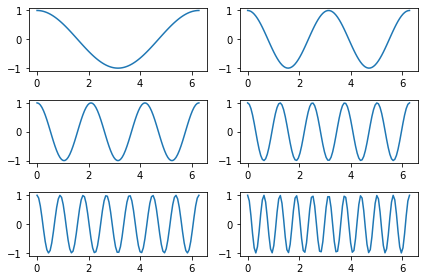

In [3]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)
    fig.tight_layout()

Since there is only one `Figure` object in this chart, it is a little strange that we are calling `fig.tight_layout()` inside the for loop, so it is getting called six times.  It makes more sense to call it outside of the for loop.  We add a line break and we remove the indentation.  The line break is just for readability; removing the indentation is what takes `fig.tight_layout()` out of the for loop.

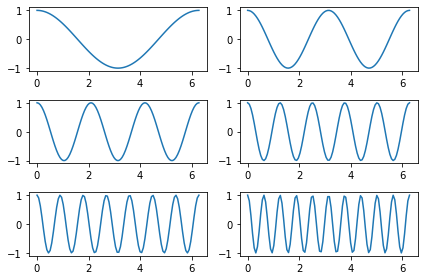

In [4]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y)

fig.tight_layout()

Next we add a legend to the chart.  We do this in two stages.  In stage one, we add a `label` to each of the subplots, using an f-string.  In stage two, we tell Matplotlib to display the label in a legend, using the `legend` method of the `Axes` object.

(For many of these customizations, I expect there are many different ways to create the same effect, and I don't necessarily claim the way introduced here is best.  One overall complaint I have about Matplotlib is that there are often many different ways to do the same thing.  That may sound like a good thing, but I find it makes the methods harder to learn.)

Here only one legend gets displayed.  Do you see what we did wrong?

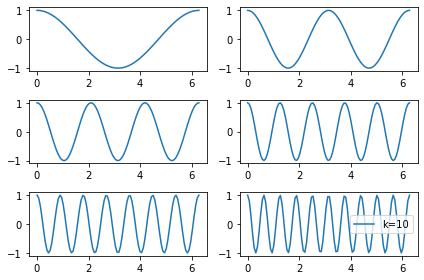

In [5]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}")

ax.legend()
fig.tight_layout()

The mistake above was the opposite of the mistake we made with `fig.tight_layout()`.  Above we were calling `ax.legend()` outside of the for loop, but there are six different `Axes` objects, each represented by the variable name `ax`, so we need to call this `legend` method within the for loop.

The following works, but the image looks pretty strange, because the Matplotlib is choosing different default locations for the legend for each of the six subplots.

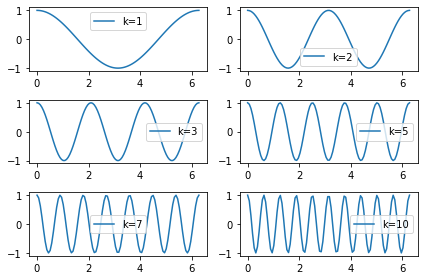

In [6]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}")
    ax.legend()

fig.tight_layout()

Let's specify that the legend should always be in the upper-right by passing `loc="upper right"` as an argument to the `legend` method.  (Definitely do not bother memorizing for example that it needs to be `"upper right"` with a space between the words.)

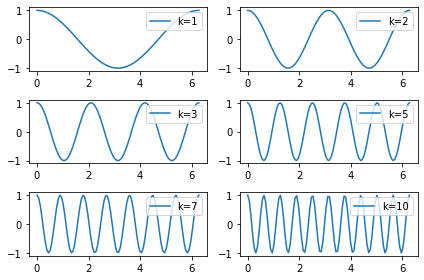

In [7]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}")
    ax.legend(loc="upper right")

fig.tight_layout()

The next portion is about some options for changing colors.  Usually we work with `matplotlib.pyplot`, but here we are working with a different submodule, the `colors` submodule.  For now we will just import a single dictionary from `matplotlib.colors`.  I knew this variable name with "TA", but I didn't exactly remember the name, so I typed `from matplotlib.colors import TA` and hit the tab key, and it autocompleted for me.  The name of `TABLEAU_COLORS` is not very easy to type, so we will give it the abbreviation `tcolors`.  (Most abbreviations we use in Math 9 are standard, and it would be a mistake to use anything else.  This `tcolors` is an exception; we just made up that abbreviation, and it would be fine to use a different one.)

In [8]:
from matplotlib.colors import TABLEAU_COLORS as tcolors

In [9]:
tcolors

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

The colors here are the colors used by default in Matplotlib.  For example, if we make two plots on the same axes, the first plot will be in the color "tab:blue" and the second plot will be in the color "tab:orange".

We will just use the keys from this dictionary.  We can access those keys by using the `keys` method of a dictionary object.  This method returns something similar to a list, but notice that the object returned is not a list.

In [10]:
tcolors.keys()

dict_keys(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])

Not surprisingly, there is also a corresponding `values` method.

In [11]:
tcolors.values()

dict_values(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

Let's try to get access to these colors.  Read the following error message (especially the last line of the error message and maybe the arrow showing where the error occurred).  Do you see what we did wrong?

ValueError: too many values to unpack (expected 2)

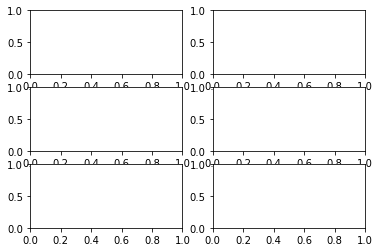

In [12]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax in zip(k_list, axs_flat, tcolors.keys()):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}")
    ax.legend(loc="upper right")

fig.tight_layout()

Do you understand what the error message is telling us?  I had originally thought that `zip` needed to be applied to things of all the same length, but I was wrong, and in this case having `tcolors.keys()` be length longer than length 6 is no problem.

The problem is that when we do tuple unpacking using for example `k,ax in ...`, there needs to be two values in each tuple, one which will get assigned to `k` and one which will get assigned to `ax`.  When we zip together three different objects, as in `zip(k_list, axs_flat, tcolors.keys())`, then we need to provide three variable names.  The keyword name for color is `c`.

If you go through these colors and compare them to the (messy) chart above where we made all of the plots on a single `Axes` object, the colors should be the same, because these colors should be the same as the default colors used by Matplotlib, and in the same order.

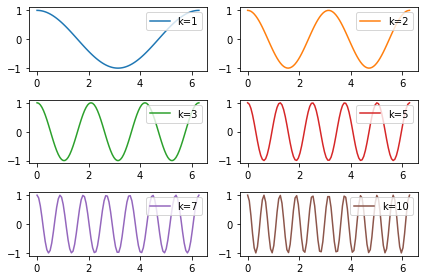

In [14]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax,color in zip(k_list, axs_flat, tcolors.keys()):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}", c=color)
    ax.legend(loc="upper right")

fig.tight_layout()

Next let's see how to add a title.  There are a few different approaches.  Here we add a title to each subplot.

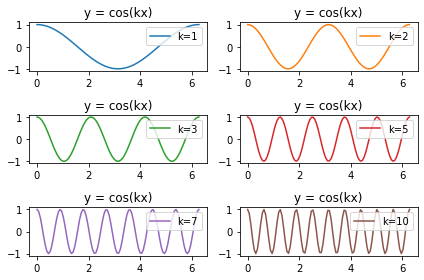

In [15]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax,color in zip(k_list, axs_flat, tcolors.keys()):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}", c=color)
    ax.legend(loc="upper right")
    ax.set(title="y = cos(kx)")

fig.tight_layout()

Here we add a title to the entire figure.

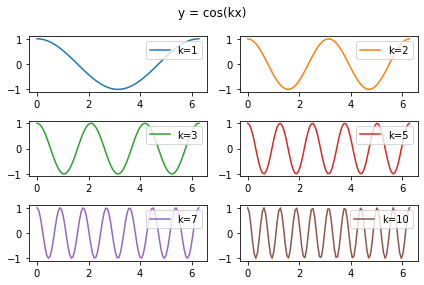

In [16]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax,color in zip(k_list, axs_flat, tcolors.keys()):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}", c=color)
    ax.legend(loc="upper right")
    
fig.suptitle("y = cos(kx)")
fig.tight_layout()

The default styling in Matplotlib can be replaced with a variety of different pre-defined options.  I think big improvements can be made by setting different styles.  The following line will change all future Matplotlib calls until you restart the kernel.  The style option I use most often is "seaborn-darkgrid".  (Seaborn itself is a very nice plotting library; Seaborn is built on Matplotlib.)

In [17]:
plt.style.use('seaborn-darkgrid')

The following code is verbatim the same as the code above.  I think the resulting figure looks a lot nicer with the Seaborn styling.

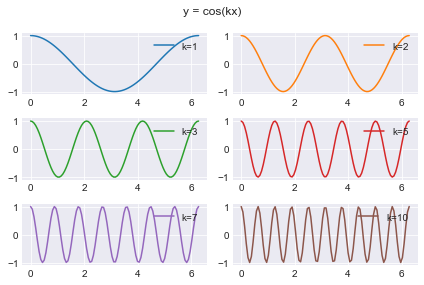

In [18]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax,color in zip(k_list, axs_flat, tcolors.keys()):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}", c=color)
    ax.legend(loc="upper right")
    
fig.suptitle("y = cos(kx)")
fig.tight_layout()

Here is a list of all the available plotting styles.  (**Challenge**.  Can you use a for loop to display the above figure in each of these different styles?  My attempt to do that failed.)

In [19]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Here is another pre-defined style I like, called "ggplot".  (The "gg" in "ggplot" stands for "grammar of graphics", which is an approach towards plotting used by many of my favorite Python plotting libraries, such as Altair, Plotly, and Seaborn.  The original ggplot plotting library was I believe for the R programming language.)

In [21]:
plt.style.use('ggplot')

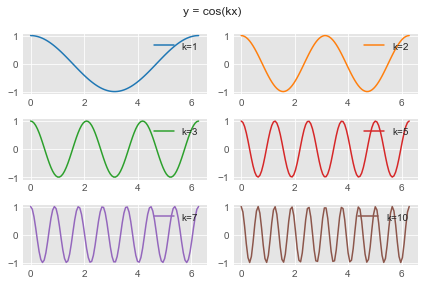

In [22]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax,color in zip(k_list, axs_flat, tcolors.keys()):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}", c=color)
    ax.legend(loc="upper right")
    
fig.suptitle("y = cos(kx)")
fig.tight_layout()

As one last example, let's choose random colors.  There are only 10 colors that are part of the `TABLEAU_COLORS` dictionary, but there are many more that are part of the `CSS4_COLORS` dictionary.

In [23]:
from matplotlib.colors import TABLEAU_COLORS as tcolors

In [24]:
len(tcolors)

10

In [25]:
from matplotlib.colors import TABLEAU_COLORS as tcolors, CSS4_COLORS as ccolors

In [26]:
len(ccolors)

148

These `CSS4_COLORS` include color names that are recognized in html, for example.

In [27]:
ccolors

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

Let's see how we can choose six random colors from this `CSS4_COLORS` dictionary.

In [28]:
rng = np.random.default_rng()

We will use the `choice` method of `rng` to choose six of these random colors.  It is not obvious to me why the following does not work.

In [29]:
colors = rng.choice(ccolors.keys(), size=len(k_list))

ValueError: a must be a sequence or an integer, not <class 'dict_keys'>

To fix the error, we convert `ccolors.keys()` to a list.

In [30]:
colors = rng.choice(list(ccolors.keys()), size=len(k_list))

Here are the six colors chosen in this case.  (If you run the code, you'll get different colors, because we haven't specified a `seed` when we instantiated the random number generator.)

In [31]:
colors

array(['saddlebrown', 'gold', 'darkorchid', 'floralwhite',
       'lightslategrey', 'darkgrey'], dtype='<U20')

Here we are using the randomly chosen colors.  We replace the `tcolors.keys()` in the `zip` with our `colors` NumPy array we just created.

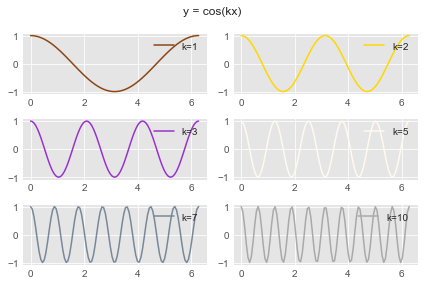

In [32]:
𝑘_list = [1,2,3,5,7,10]
x = np.linspace(0, 2*np.pi, 100)

fig, axs = plt.subplots(3,2)
axs_flat = axs.reshape(-1)

for k,ax,color in zip(k_list, axs_flat, colors):
    f = lambda x: np.cos(k*x)
    y = f(x)
    ax.plot(x,y, label=f"k={k}", c=color)
    ax.legend(loc="upper right")
    
fig.suptitle("y = cos(kx)")
fig.tight_layout()

There is certainly much more we could do involving customizations of Matplotlib plots, but we are going to go on to a new topic, Newton's Method.